In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Giai đoạn 1: Thu thập dữ liệu 

pd.set_option("expand_frame_repr", False)
df= pd.read_csv('final(2).csv')
df2 = pd.DataFrame(df)
df2.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress',
               'Threats','Port','Prediction']
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


In [6]:
# Làm sạch dữ liệu
# Đổi tên "Bonet" thành "Botnet"

df2['Threats'] = df2['Threats'].str.replace('Bonet', 'Botnet')

# In ra kết quả DataFrame được làm lại
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Botnet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Botnet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Botnet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Botnet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


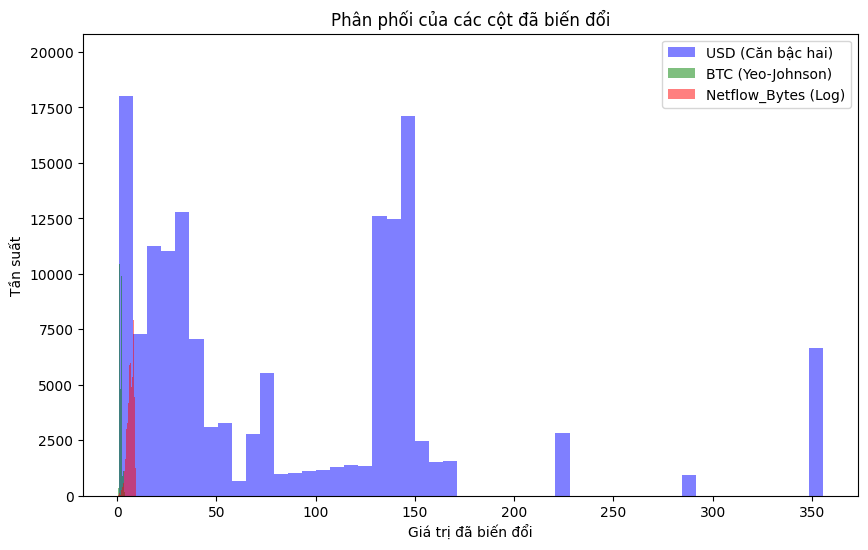

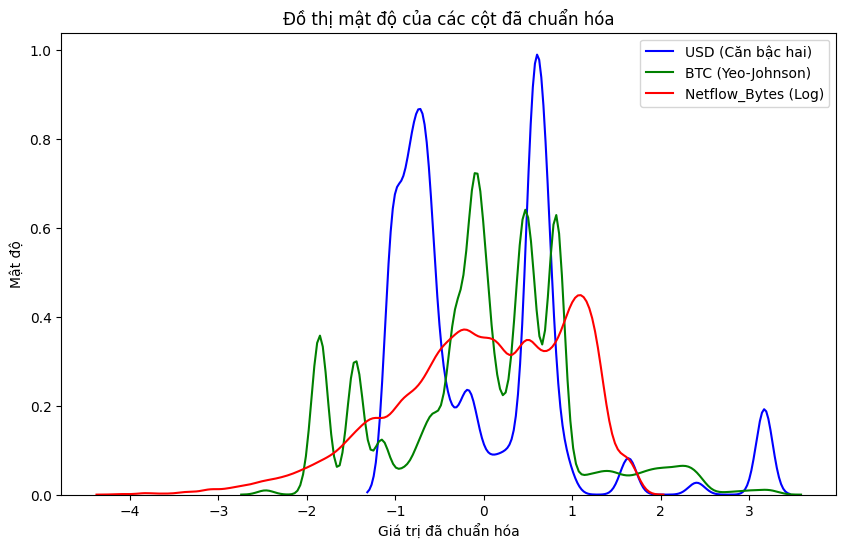

In [4]:
# Giai đoạn 2: Chuẩn bị dữ liệu (kỹ thuật tạo đặc trưng và biến đổi dữ liệu)

# --- Loại bỏ các hàng trùng lặp --- #

df2 = df2.drop_duplicates()

# --- Loại bỏ giá trị âm từ đặc trưng thời gian/dấu thời gian --- #

df2['Time'] = df2['Time'] + 11

# thêm 11 vào mỗi giá trị trong cột 'Time' của DataFrame 'df2'.
# Nói cách khác, đây là phép cộng từng phần tử vào tất cả các giá trị trong cột 'Time',
# tăng mỗi giá trị lên 11 đơn vị. Điều này thường được thực hiện trong biến đổi dữ liệu để điều chỉnh hoặc thay đổi giá trị thời gian hoặc số học
# bằng một lượng cố định

# --- Biến đổi toán học để giảm độ lệch --- #

# --- Áp dụng biến đổi logarit cho cột NETFLOW_BYTES --- #
# Biến đổi logarit bao gồm việc lấy logarit tự nhiên (cơ số e) của mỗi điểm dữ liệu trong một cột hoặc đặc trưng cụ thể.
# Biến đổi logarit thường được sử dụng để giảm ảnh hưởng của các giá trị cực đại (ngoại lệ) và làm cho dữ liệu tuân theo phân phối chuẩn hơn.
# Chúng đặc biệt hữu ích khi xử lý dữ liệu có độ lệch dương,
# nơi đuôi của phân phối bị kéo dài về phía bên phải.

# Hàm np.log() là cách phổ biến để thực hiện biến đổi logarit trong Python.
# Việc cộng thêm 1 vào các điểm dữ liệu thường được sử dụng để tránh vấn đề khi lấy logarit của số không hoặc giá trị âm.
# Đây là một phương pháp phổ biến để thêm một hằng số nhỏ như 1 vào dữ liệu trước khi áp dụng logarit.

# Bằng cách áp dụng biến đổi logarit cho một đặc trưng, bạn cơ bản là đang nén phạm vi giá trị của đặc trưng đó,
# có thể giúp trong trường hợp dữ liệu có độ lệch phải, làm cho nó phù hợp hơn cho một số loại phân tích
# hoặc kỹ thuật mô hình hóa giả định dữ liệu phân phối chuẩn.

df2['Netflow_Bytes'] = np.log(df2['Netflow_Bytes']+1)

# --- Áp dụng biến đổi căn bậc hai cho cột USD ---#

# Biến đổi căn bậc hai: Biến đổi căn bậc hai bao gồm việc lấy căn bậc hai của mỗi điểm dữ liệu trong
# cột được chỉ định. Trong trường hợp này, nó được áp dụng cho cột 'USD'.

# Biến đổi căn bậc hai là một loại biến đổi toán học được sử dụng để giảm ảnh hưởng của dữ liệu lệch phải.
# Giống như biến đổi logarit, biến đổi căn bậc hai có thể giúp làm cho dữ liệu đối xứng hơn và gần với
# phân phối chuẩn hơn.

# Hàm np.sqrt() được sử dụng để tính căn bậc hai.
# Bằng cách áp dụng biến đổi căn bậc hai cho cột 'USD', mã đang cố gắng làm cho phân phối dữ liệu ít lệch hơn
# và phù hợp hơn cho một số phân tích thống kê hoặc kỹ thuật mô hình hóa giả định dữ liệu phân phối chuẩn hoặc
# yêu cầu dữ liệu phải đối xứng hơn. Đây là một kỹ thuật phổ biến được sử dụng trong tiền xử lý dữ liệu để cải thiện chất lượng dữ liệu cho
# phân tích hoặc mô hình hóa

df2['USD'] = np.sqrt(df2['USD'])

# --- Áp dụng biến đổi Yeo-Johnson cho cột BTC ---#

# Biến đổi Yeo-Johnson được áp dụng cho cột 'BTC' trong DataFrame (df2['BTC']).
# Biến đổi này được sử dụng để chỉnh sửa dữ liệu trong cột 'BTC' để làm cho phân phối của nó trở nên chuẩn hóa hoặc đối xứng hơn
# Biến đổi Yeo-Johnson là một kỹ thuật biến đổi toán học được sử dụng để chỉnh sửa phân phối dữ liệu.
# Nó có thể được áp dụng cho cả giá trị dương và âm và linh hoạt hơn so với một số biến đổi khác như biến đổi Box-Cox.

# Biến đổi được thực hiện bằng cách sử dụng hàm stats.yeojohnson() từ một thư viện như SciPy
df2['BTC'], _ = stats.yeojohnson(df2['BTC'])

#--VẼ ĐỒ THỊ DỮ LIỆU ĐÃ BIẾN ĐỔI--#

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ đồ thị cột 'USD' đã biến đổi
ax.hist(df2['USD'], bins=50, alpha=0.5, color='blue', label='USD (Căn bậc hai)')

# Vẽ đồ thị cột 'BTC' đã biến đổi
ax.hist(df2['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')

# Vẽ đồ thị cột 'Netflow_Bytes' đã biến đổi
ax.hist(df2['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')

# Thêm nhãn và chú giải
ax.set_xlabel('Giá trị đã biến đổi')
ax.set_ylabel('Tần suất')
ax.set_title('Phân phối của các cột đã biến đổi')
ax.legend()

# Hiển thị đồ thị
plt.show()

# Tạo hình ảnh và trục cho đồ thị
fig, ax = plt.subplots(figsize=(10, 6))

# Tạo một thể hiện của StandardScaler
# StandardScaler là một kỹ thuật tiền xử lý phổ biến được sử dụng trong máy học và phân tích dữ liệu.
# Nó được sử dụng để chuẩn hóa hoặc tiêu chuẩn hóa các đặc trưng của một tập dữ liệu bằng cách chia tỷ lệ chúng sao cho chúng có trung bình là 0 và độ lệch chuẩn là 1.

# Chuẩn hóa các đặc trưng là hữu ích bởi vì nó làm cho các đặc trưng khác nhau có thể so sánh trực tiếp hơn, đặc biệt là trong các thuật toán
# nhạy cảm với quy mô của dữ liệu đầu vào, như nhiều thuật toán máy học.
# Trong mã được cung cấp, scaler được tạo ra như một thể hiện của lớp StandardScaler, sau đó có thể được sử dụng để chuẩn hóa
# các cột được chỉ định trong DataFrame df2 bằng phương pháp fit_transform, như được thấy trong mã tiếp theo

scaler = StandardScaler()

# Chuẩn hóa các đặc trưng của mỗi cột
df2_normalized = df2.copy()
df2_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df2[['USD', 'BTC', 'Netflow_Bytes']])

# Vẽ đồ thị mật độ của cột 'USD' đã chuẩn hóa
sns.kdeplot(df2_normalized['USD'], color='blue', label='USD (Căn bậc hai)', ax=ax)

# Vẽ đồ thị mật độ của cột 'BTC' đã chuẩn hóa
sns.kdeplot(df2_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)

# Vẽ đồ thị mật độ của cột 'Netflow_Bytes' đã chuẩn hóa
sns.kdeplot(df2_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)

# Thêm nhãn và chú giải
ax.set_xlabel('Giá trị đã chuẩn hóa')
ax.set_ylabel('Mật độ')
ax.set_title('Đồ thị mật độ của các cột đã chuẩn hóa')
ax.legend()

# Hiển thị đồ thị
plt.show()

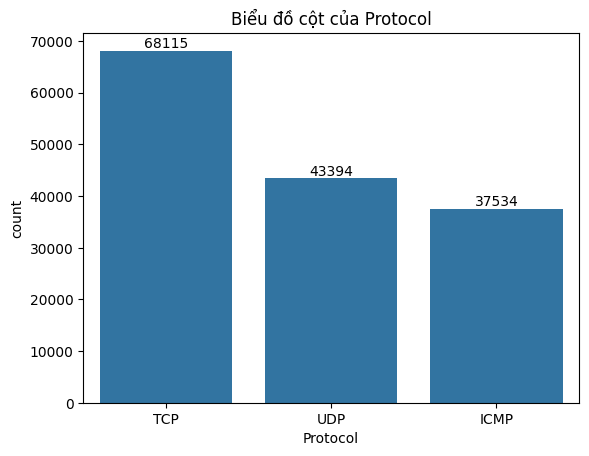

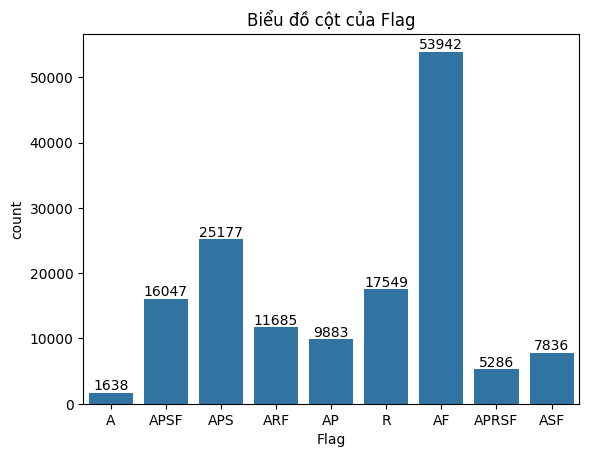

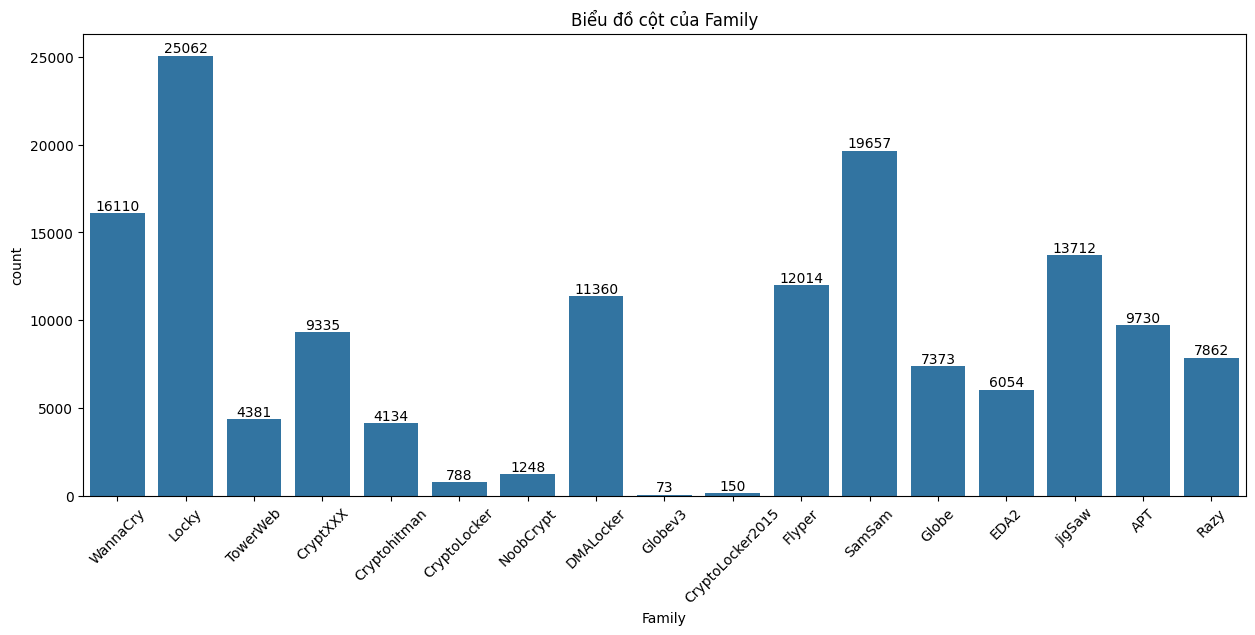

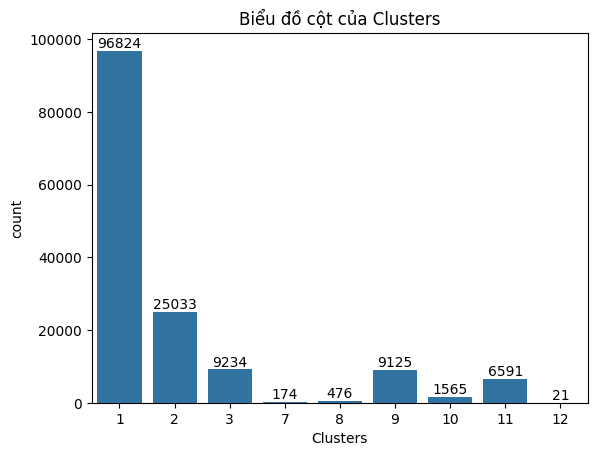

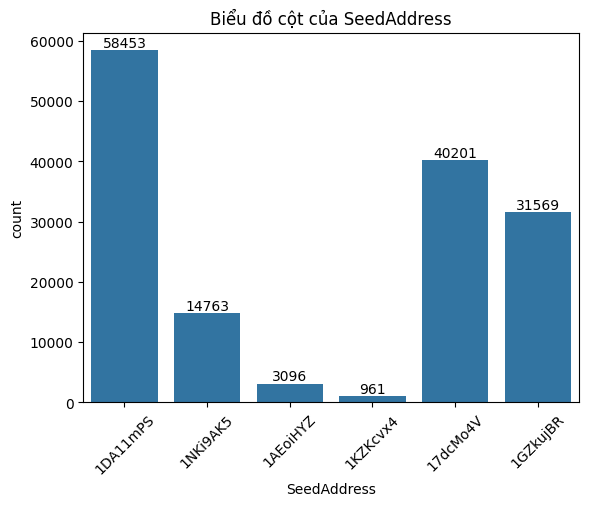

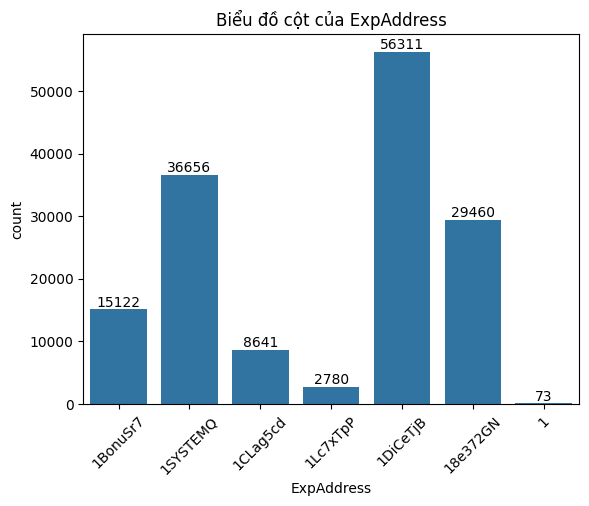

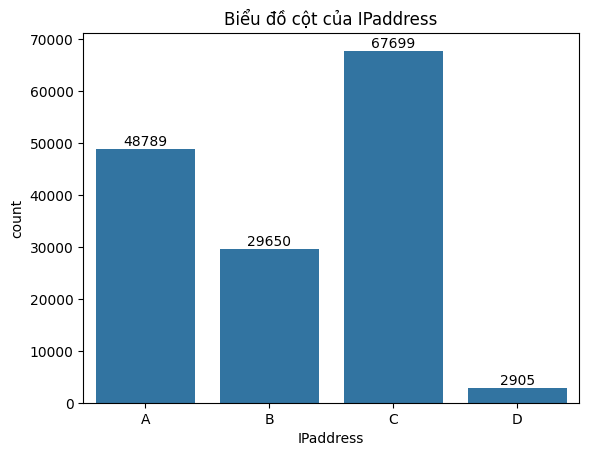

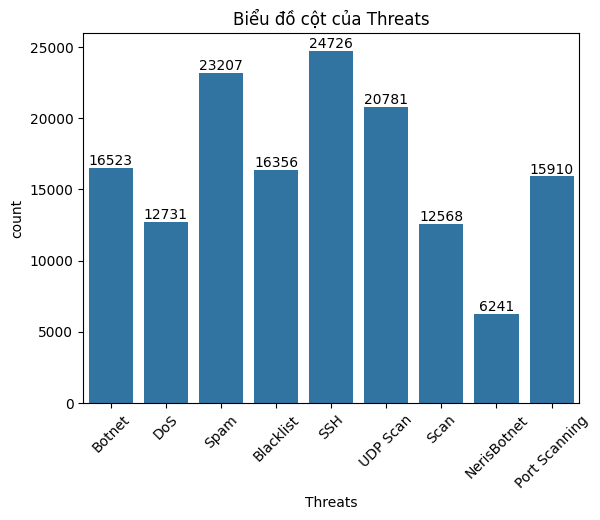

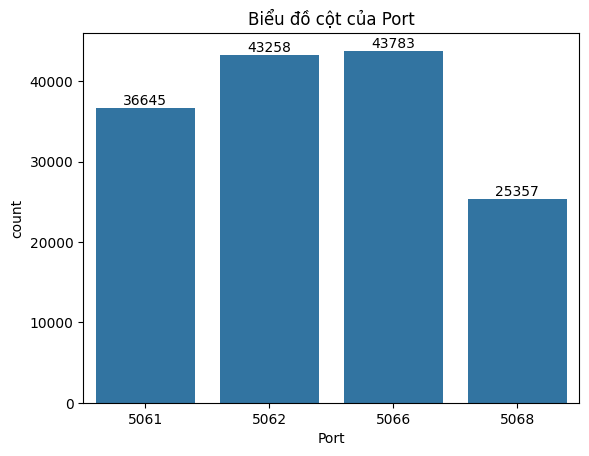

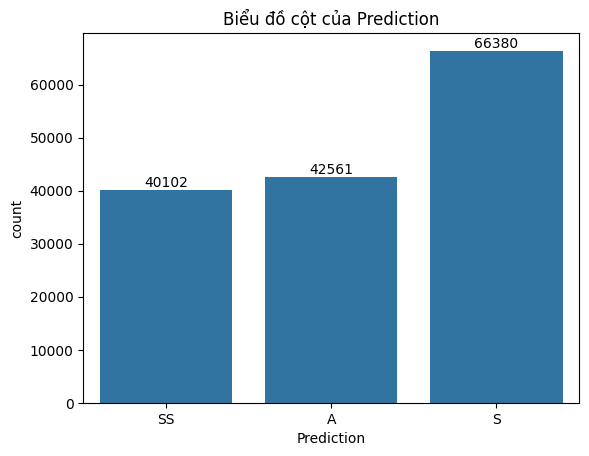

In [5]:
# Giai đoạn 3: Trực quan hóa dữ liệu

# --- Trực quan hóa số lượng --- #

# Trực quan hóa số lượng theo loại

# Số lượng Protocol

ax = sns.countplot(x=df2['Protocol'], data=df2)
plt.title('Biểu đồ cột của Protocol')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng Flag

ax = sns.countplot(x=df2['Flag'], data=df2)
plt.title('Biểu đồ cột của Flag')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng Family

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df2['Family'], data=df2)
plt.title('Biểu đồ cột của Family')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng Clusters

ax = sns.countplot(x=df2['Clusters'], data=df2)
plt.title('Biểu đồ cột của Clusters')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng SeedAddress

ax = sns.countplot(x=df2['SeedAddress'], data=df2)
plt.title('Biểu đồ cột của SeedAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng ExpAddress

ax = sns.countplot(x=df2['ExpAddress'], data=df2)
plt.title('Biểu đồ cột của ExpAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng IPaddress

ax = sns.countplot(x=df2['IPaddress'], data=df2)
plt.title('Biểu đồ cột của IPaddress')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng Threats

ax = sns.countplot(x=df2['Threats'], data=df2)
plt.title('Biểu đồ cột của Threats')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng Port

ax = sns.countplot(x=df2['Port'], data=df2)
plt.title('Biểu đồ cột của Port')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Số lượng Prediction

ax = sns.countplot(x=df2['Prediction'], data=df2)
plt.title('Biểu đồ cột của Prediction')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

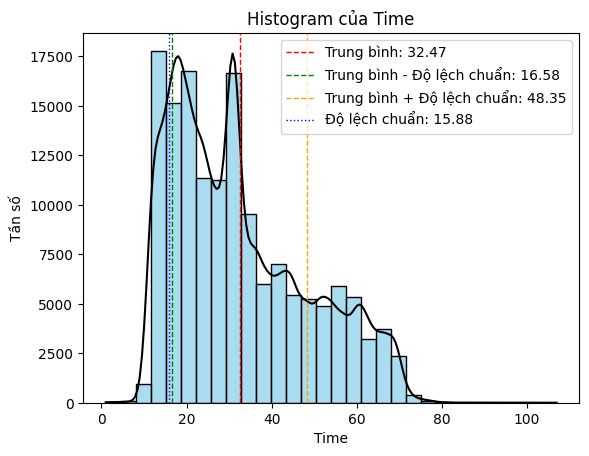

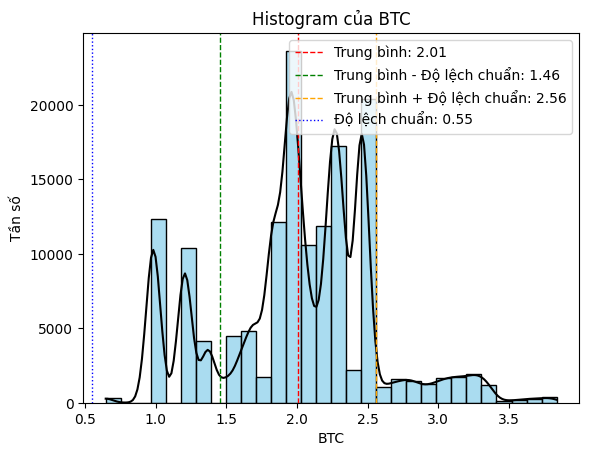

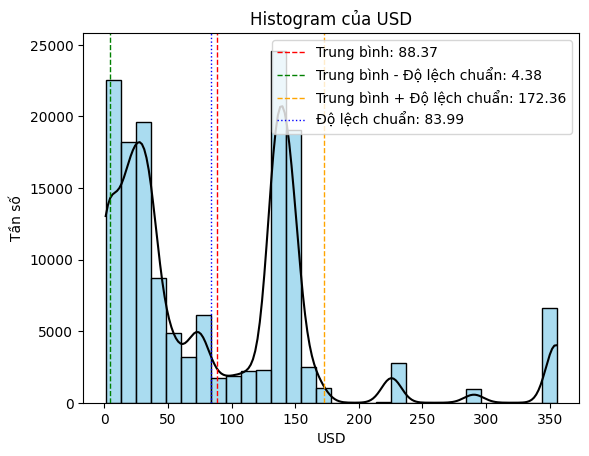

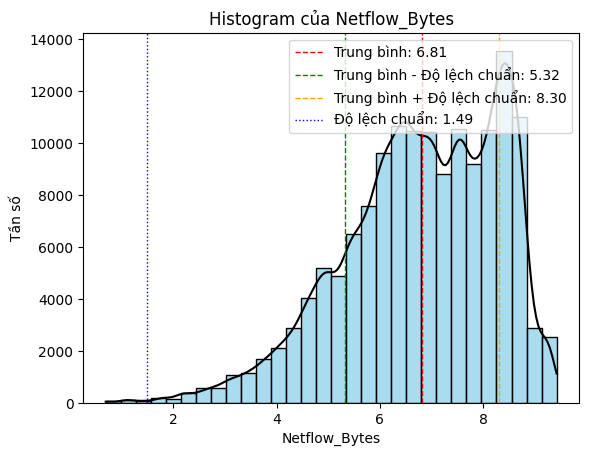

In [6]:
# --- Trực quan hóa số học (số lượng, trung bình và độ lệch chuẩn) --- #

# Thời gian

feature = 'Time'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Trung bình: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Trung bình - Độ lệch chuẩn: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Trung bình + Độ lệch chuẩn: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Độ lệch chuẩn: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram của {feature}')
plt.xlabel(feature)
plt.ylabel('Tần số')
plt.show()

# BTC

feature = 'BTC'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Trung bình: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Trung bình - Độ lệch chuẩn: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Trung bình + Độ lệch chuẩn: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Độ lệch chuẩn: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram của {feature}')
plt.xlabel(feature)
plt.ylabel('Tần số')
plt.show()

# USD

feature = 'USD'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Trung bình: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Trung bình - Độ lệch chuẩn: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Trung bình + Độ lệch chuẩn: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Độ lệch chuẩn: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram của {feature}')
plt.xlabel(feature)
plt.ylabel('Tần số')
plt.show()

# Netflow_Bytes

feature = 'Netflow_Bytes'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Trung bình: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Trung bình - Độ lệch chuẩn: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Trung bình + Độ lệch chuẩn: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Độ lệch chuẩn: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram của {feature}')
plt.xlabel(feature)
plt.ylabel('Tần số')
plt.show()

In [8]:
# Mô-đun tiền xử lý trong scikit-learn cung cấp nhiều công cụ và kỹ thuật để tiền xử lý dữ liệu của bạn trước
# khi đưa vào các mô hình học máy.
# Việc tiền xử lý này rất quan trọng để cải thiện chất lượng dữ liệu và hiệu suất của các mô hình của bạn.

from sklearn import preprocessing 
# Đoạn mã sử dụng LabelEncoder của scikit-learn để chuyển đổi các biến phân loại thành giá trị số.
# Mỗi cột phân loại, như 'Protocol', 'Flag', 'Family', 'SeedAddress', 'ExpAddress', 'IPaddress', 'Threats', và
# 'Prediction', được mã hóa thành các nhãn số duy nhất.
# Bước tiền xử lý này rất cần thiết cho các thuật toán học máy, vì chúng thường yêu cầu dữ liệu đầu vào dạng số
# thay vì nhãn phân loại.

lab_encoder = preprocessing.LabelEncoder()                     # chuyển đổi từ phân loại sang số
df2['Protocol'] = lab_encoder.fit_transform(df2['Protocol'])
df2['Flag'] = lab_encoder.fit_transform(df2['Flag'])
df2['Family'] = lab_encoder.fit_transform(df2['Family'])

df2['SeedAddress'] = lab_encoder.fit_transform(df2['SeedAddress'])
df2['ExpAddress'] = lab_encoder.fit_transform(df2['ExpAddress'])
df2['IPaddress'] = lab_encoder.fit_transform(df2['IPaddress'])
df2['Threats'] = lab_encoder.fit_transform(df2['Threats'])
df2['Prediction'] = lab_encoder.fit_transform(df2['Prediction'])
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,61,1,0,16,1,2,2,0.645909,22.360680,1.791759,0,1,5061,2
1,51,1,0,16,1,2,2,0.645909,22.449944,2.197225,0,1,5061,2
2,41,1,0,16,1,2,2,0.645909,22.538855,2.079442,0,1,5061,2
3,31,1,0,16,1,2,2,0.645909,22.627417,2.772589,0,1,5061,2
4,68,1,0,16,1,2,2,0.645909,22.715633,2.302585,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,44,2,2,15,3,1,6,3.686013,39.874804,8.114025,0,6,5062,0
149039,44,2,2,15,3,1,6,3.686961,39.949969,8.117312,0,6,5062,0
149040,44,2,2,15,3,1,6,3.687905,40.024992,8.120589,0,6,5062,0
149041,44,2,2,15,3,1,6,3.688844,40.099875,8.123854,0,6,5062,0


In [5]:
# Hàm train_test_split từ scikit-learn được sử dụng để chia tập dữ liệu thành hai tập con:
# một tập huấn luyện và một tập kiểm tra (hoặc tập xác thực). Hàm này thường được sử dụng trong học máy
# để đánh giá hiệu suất của mô hình trên dữ liệu chưa thấy. Nó nhận đầu vào là tập dữ liệu, thường được biểu diễn dưới dạng đặc trưng (X)
# và nhãn (y), và chia nó thành dữ liệu huấn luyện (X_train và y_train) được sử dụng để huấn luyện mô hình và
# dữ liệu kiểm tra (X_test và y_test) được sử dụng để đánh giá hiệu suất của mô hình.

from sklearn.model_selection import train_test_split  # thư viện cho các mô hình học máy

# quy trình phổ biến trong học máy để chia tập dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng hàm train_test_split
# từ scikit-learn. Dưới đây là giải thích về từng dòng mã:

X = df2.iloc[:, :-1] # Dòng này chọn tất cả các hàng và tất cả các cột của DataFrame df2 ngoại trừ cột cuối cùng.
# Nó giả định rằng cột cuối cùng chứa biến mục tiêu hoặc nhãn, và X sẽ chứa tất cả các cột đặc trưng

y = df2.iloc[:, -1]  # Dòng này chọn tất cả các hàng nhưng chỉ chọn cột cuối cùng của DataFrame df2.
# Điều này để tách biến mục tiêu hoặc nhãn, và y sẽ chứa những nhãn này.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)  # chia tập kiểm tra và huấn luyện thành 4 phần
# Dòng này sử dụng hàm train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm tra.
# Dưới đây là giải thích về các tham số:

# X và y: Ma trận đặc trưng và biến mục tiêu.
# train_size=0.8: Tham số này chỉ định rằng 80% dữ liệu nên được sử dụng cho việc huấn luyện
# (bạn có thể điều chỉnh tỷ lệ phần trăm này theo nhu cầu).
# random_state=42: Tham số này đặt hạt ngẫu nhiên để đảm bảo khả năng tái tạo, đảm bảo rằng việc chia là giống nhau mỗi khi bạn
# chạy mã.

# Sau khi chạy mã này, bạn sẽ có:

# X_train: Ma trận đặc trưng cho việc huấn luyện.
# X_test: Ma trận đặc trưng cho việc kiểm tra.
# y_train: Biến mục tiêu cho việc huấn luyện.
# y_test: Biến mục tiêu cho việc kiểm tra.
# Những tập con này sau đó có thể được sử dụng để huấn luyện và đánh giá các mô hình học máy của bạn.

In [6]:
X_train
X_test
y_train
y_test

42916      S
45544     SS
137525     A
108170     S
85804     SS
          ..
91256      S
132188     S
94999     SS
3431       A
147946     A
Name: Prediction, Length: 29809, dtype: object

In [11]:
# Lệnh %%time thường được sử dụng trong môi trường Jupyter Notebook, như Jupyter Notebook hoặc JupyterLab.
# Đây được gọi là "magic command" và được sử dụng để đo thời gian thực thi của một cell code cụ thể.
# Khi bạn bao gồm %%time ở đầu một cell, nó yêu cầu Jupyter đo thời gian để chạy mã trong cell đó.
#%%time

# Nhập các thư viện và công cụ khác nhau để xây dựng và đánh giá các mô hình học máy trong Python
# Các mô hình đã nhập: ensemble, random forest, SVM, Naive Bayes, thuật toán di truyền
# Các chỉ số đánh giá đã nhập: độ chính xác, độ chính xác, độ nhớ lại, điểm f1

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier # phương pháp ensemble của stacking classify cho ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

from sklearn.tree import DecisionTreeClassifier   # ước lượng trong GA
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Đặt số lượng cây trong Rừng Ngẫu nhiên. 
# Trong trường hợp này, có 100 cây trong rừng

# random_state: Tham số này được sử dụng để đặt hạt ngẫu nhiên cho khả năng tái sản xuất. 
# Bằng cách đặt nó thành 42, quá trình ngẫu nhiên sẽ giống nhau mỗi khi mã được chạy,
# đảm bảo kết quả nhất quán cho mô hình Rừng Ngẫu nhiên.

rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)

# Đoạn mã này sử dụng bộ phân loại Rừng Ngẫu nhiên đã được huấn luyện (rf) để dự đoán dữ liệu kiểm tra (X_test). 
# Phương thức predict nhận các đặc trưng kiểm tra trong X_test làm đầu vào và tạo ra nhãn dự đoán cho các đặc trưng này. 
# Các dự đoán được lưu trữ trong biến rf_pred, có thể được sử dụng cho đánh giá hoặc phân tích tiếp theo để đánh giá hiệu suất của 
# mô hình trên dữ liệu chưa thấy.



rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Độ chính xác của Rừng Ngẫu nhiên : ', round(rf_accuracy, 3))
print('Báo cáo phân loại của Rừng Ngẫu nhiên : \n', rf_report)
print('Ma trận nhầm lẫn của Rừng Ngẫu nhiên : \n', rf_matrix)




# Hàm accuracy_score từ scikit-learn được sử dụng để tính toán độ chính xác của các dự đoán của mô hình (rf_pred) 
# so với nhãn thực tế (y_test). Điểm số này đo lường tỷ lệ của các trường hợp được phân loại chính xác.
# classification_report: Hàm classification_report tạo ra một báo cáo toàn diện bao gồm độ chính xác, recall, 
# F1-score, và hỗ trợ cho mỗi lớp trong vấn đề phân loại. Nó cung cấp cái nhìn chi tiết về hiệu suất của mô hình 
# đối với các lớp khác nhau.
# confusion_matrix: Hàm confusion_matrix tính toán một ma trận nhầm lẫn tóm tắt số lượng true positive, true negative, 
# false positive, và false negative cho kết quả phân loại. Nó giúp hiểu rõ hơn về hiệu suất của mô hình và nơi mà nó có thể mắc lỗi.

# Cuối cùng, mã in ra độ chính xác, báo cáo phân loại, và ma trận nhầm lẫn cho mô hình Rừng Ngẫu nhiên, 
# cho phép bạn đánh giá hiệu suất của nó trên dữ liệu kiểm tra.

Độ chính xác của Rừng Ngẫu nhiên :  0.994
Báo cáo phân loại của Rừng Ngẫu nhiên : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8400
           1       0.99      0.99      0.99     13359
           2       1.00      0.99      0.99      8050

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809

Ma trận nhầm lẫn của Rừng Ngẫu nhiên : 
 [[ 8346    49     5]
 [   49 13280    30]
 [    8    44  7998]]


In [13]:
svr = LinearSVC() # Tạo một thể hiện của bộ phân loại LinearSVC

svr.fit(X_train, y_train) # Huấn luyện bộ phân loại LinearSVC trên dữ liệu huấn luyện (X_train và y_train). 
# Bước này liên quan đến việc tìm siêu mặt phẳng tốt nhất để phân tách các điểm dữ liệu của các lớp khác nhau 
# trong khi tối đa hóa lề giữa chúng.

svr_pred = svr.predict(X_test) # Sử dụng bộ phân loại SVM đã được huấn luyện để dự đoán dữ liệu kiểm tra (X_test). 
# Các dự đoán này được lưu trữ trong biến svr_pred.

svr_accuracy = accuracy_score(svr_pred, y_test) # Tính độ chính xác của các dự đoán của bộ phân loại SVM trên dữ liệu kiểm tra (svr_pred) 
# bằng cách so sánh chúng với nhãn thực sự (y_test). Kết quả được lưu trữ trong biến svr_accuracy.

svr_report = classification_report(svr_pred, y_test) # Sử dụng hàm classification_report để tạo một báo cáo phân loại chi tiết, 
# bao gồm các chỉ số như độ chính xác, độ nhớ lại, điểm F1 và hỗ trợ cho mỗi lớp. 
# Báo cáo này được lưu trữ trong biến svr_report.

svr_matrix = confusion_matrix(svr_pred, y_test) # Tính ma trận nhầm lẫn dựa trên các dự đoán (svr_pred) và 
# nhãn thực sự (y_test). Ma trận nhầm lẫn cung cấp thông tin về số lượng dự đoán đúng dương, đúng âm, 
# sai dương và sai âm. Nó được lưu trữ trong biến svr_matrix.

print('Độ chính xác của SVM : ', round(svr_accuracy, 3)) # In độ chính xác của bộ phân loại SVM với giá trị làm tròn.
print('Báo cáo phân loại của SVM : \n', svr_report) # In báo cáo phân loại, bao gồm độ chính xác, độ nhớ lại, điểm F1 và hỗ trợ cho mỗi lớp.
print('Ma trận nhầm lẫn của SVM :\n', svr_matrix) # In ma trận nhầm lẫn, cho thấy phân phối của các dự đoán đúng và sai.
# Các chỉ số này giúp đánh giá hiệu suất của bộ phân loại SVM về khả năng phân loại chính xác các điểm dữ liệu vào các lớp khác nhau.

Độ chính xác của SVM :  0.667
Báo cáo phân loại của SVM : 
               precision    recall  f1-score   support

           0       0.88      0.47      0.62     15632
           1       0.73      0.92      0.81     10556
           2       0.34      0.76      0.47      3621

    accuracy                           0.67     29809
   macro avg       0.65      0.72      0.63     29809
weighted avg       0.76      0.67      0.67     29809

Ma trận nhầm lẫn của SVM :
 [[7416 3150 5066]
 [ 602 9721  233]
 [ 385  502 2734]]


Độ chính xác của Naive Bayes :  0.777
Báo cáo phân loại của Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78     29809

Ma trận nhầm lẫn của Naive Bayes :
 [[ 5380  1357  1256]
 [ 1109 11543   539]
 [ 1914   473  6238]]
Độ chính xác của Naive Bayes :  0.777
Báo cáo phân loại của Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.

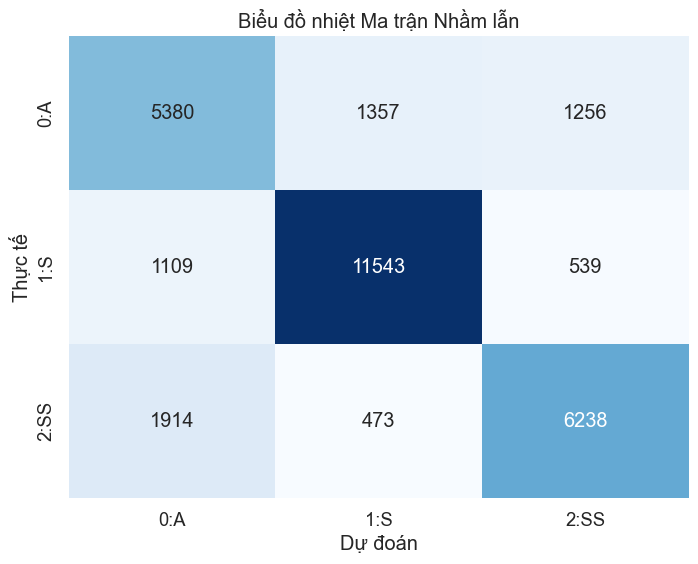

In [14]:
# Thuật toán Naive Bayes

nb = GaussianNB() # Tạo một thể hiện của bộ phân loại GaussianNB
nb.fit(X_train, y_train) # Huấn luyện bộ phân loại GaussianNB trên dữ liệu huấn luyện (X_train và y_train)
nb_pred = nb.predict(X_test) # Sử dụng bộ phân loại GaussianNB đã được huấn luyện để dự đoán dữ liệu kiểm tra (X_test)

nb_accuracy = accuracy_score(nb_pred, y_test) # Tính độ chính xác của các dự đoán của bộ phân loại Naive Bayes so với nhãn thực tế (y_test)
nb_report = classification_report(nb_pred, y_test) # Tạo báo cáo phân loại chi tiết bao gồm độ chính xác, độ nhớ lại, điểm F1 và hỗ trợ cho mỗi lớp
nb_matrix = confusion_matrix(nb_pred, y_test) # Tính ma trận nhầm lẫn dựa trên các dự đoán và nhãn thực tế

print('Độ chính xác của Naive Bayes : ', round(nb_accuracy, 3)) # In độ chính xác của bộ phân loại Naive Bayes
print('Báo cáo phân loại của Naive Bayes : \n', nb_report) # In báo cáo phân loại của Naive Bayes
print('Ma trận nhầm lẫn của Naive Bayes :\n', nb_matrix) # In ma trận nhầm lẫn của Naive Bayes

# Giả sử bạn đã có nb_pred và y_test được định nghĩa

nb_accuracy = accuracy_score(nb_pred, y_test) # Tính độ chính xác của bộ phân loại Naive Bayes
nb_report = classification_report(nb_pred, y_test) # Tạo báo cáo phân loại cho bộ phân loại Naive Bayes
nb_matrix = confusion_matrix(nb_pred, y_test) # Tạo ma trận nhầm lẫn cho bộ phân loại Naive Bayes

print('Độ chính xác của Naive Bayes : ', round(nb_accuracy, 3)) # In độ chính xác của bộ phân loại Naive Bayes
print('Báo cáo phân loại của Naive Bayes : \n', nb_report) # In báo cáo phân loại của Naive Bayes
print('Ma trận nhầm lẫn của Naive Bayes :\n', nb_matrix) # In ma trận nhầm lẫn của Naive Bayes

# Vẽ ma trận nhầm lẫn dưới dạng biểu đồ nhiệt
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Điều chỉnh kích thước phông chữ để dễ đọc hơn
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Biểu đồ nhiệt Ma trận Nhầm lẫn")
plt.show()

Độ chính xác của Naive Bayes :  0.777
Báo cáo phân loại của Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78     29809

Ma trận nhầm lẫn của Naive Bayes :
 [[ 5380  1357  1256]
 [ 1109 11543   539]
 [ 1914   473  6238]]


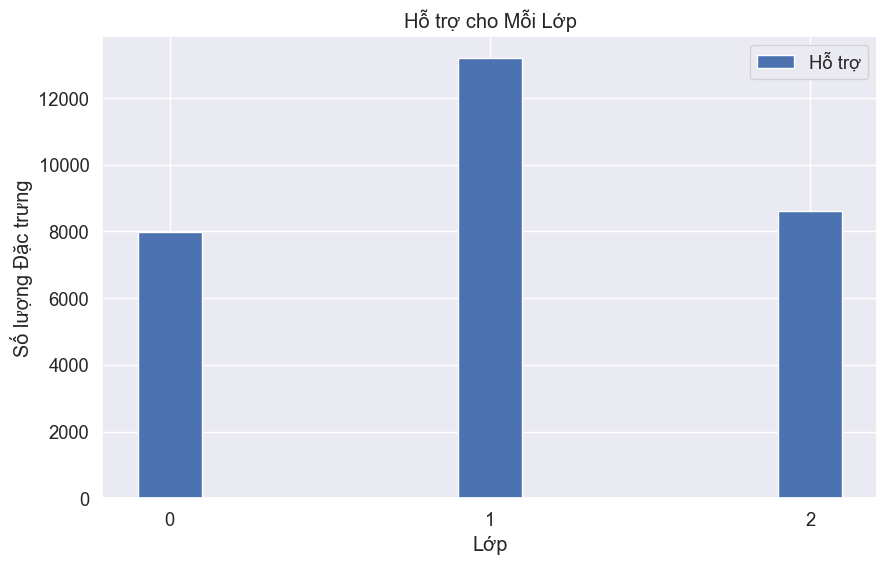

In [15]:
# Giả sử bạn đã định nghĩa sẵn nb_pred và y_test

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Sử dụng output_dict=True để lấy các chỉ số dưới dạng từ điển
nb_matrix = confusion_matrix(nb_pred, y_test)

# Trích xuất hỗ trợ cho tất cả các lớp
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Lấy tất cả các nhãn duy nhất
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

print('Độ chính xác của Naive Bayes : ', round(nb_accuracy, 3))
print('Báo cáo phân loại của Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Ma trận nhầm lẫn của Naive Bayes :\n', nb_matrix)

# Vẽ biểu đồ hỗ trợ
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.2, label='Hỗ trợ', align='center')

plt.xlabel('Lớp')
plt.ylabel('Số lượng Đặc trưng')
plt.xticks(labels)
plt.legend()
plt.title('Hỗ trợ cho Mỗi Lớp')
plt.show()

In [17]:
cac_uoc_luong = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
clf = StackingClassifier(
    estimators=cac_uoc_luong, final_estimator=GaussianNB())

# Trong đoạn mã này, một Bộ phân loại chồng (clf) được định nghĩa bằng cách sử dụng StackingClassifier của scikit-learn.
# Chồng là một phương pháp học tập tập hợp kết hợp nhiều ước lượng cơ sở để cải thiện hiệu suất dự đoán.

# Dưới đây là một phân tích của mã:

# cac_uoc_luong: Đây là một danh sách các bộ, trong đó mỗi bộ chứa tên của ước lượng và đối tượng ước lượng.
# Hai ước lượng cơ sở được định nghĩa:

# 'rf': Một Bộ phân loại Rừng ngẫu nhiên với 1000 ước lượng và hạt giống ngẫu nhiên là 42.
# 'svr': Một Bộ phân loại Vector hỗ trợ tuyến tính (LinearSVC) với hạt giống ngẫu nhiên là 42.
# clf: Bộ phân loại chồng được tạo bằng cách sử dụng lớp StackingClassifier. Nó nhận hai tham số chính:

# cac_uoc_luong: Tham số này nhận danh sách các ước lượng cơ sở được định nghĩa trước đó.
# final_estimator: Tham số này chỉ định ước lượng meta kết hợp các dự đoán từ các ước lượng cơ sở.
# Trong trường hợp này, một Bộ phân loại Naive Bayes Gaussian (GaussianNB) được sử dụng làm ước lượng cuối cùng.
# Bộ phân loại chồng kết hợp các dự đoán của các bộ phân loại cơ sở ('rf' và 'svr') bằng cách sử dụng ước lượng cuối cùng (GaussianNB)
# Phương pháp tập hợp này thường cải thiện hiệu suất phân loại bằng cách tận dụng sức mạnh của nhiều bộ phân loại.

In [18]:
clf.fit(X_train, y_train) # Huấn luyện Bộ phân loại chồng (clf) trên dữ liệu huấn luyện (X_train và y_train)
pred = clf.predict(X_test) # Sử dụng bộ phân loại đã được huấn luyện để dự đoán nhãn mục tiêu cho dữ liệu kiểm tra (X_test)
accuracy = accuracy_score(pred, y_test) # Tính độ chính xác của các dự đoán bằng cách sử dụng hàm accuracy_score của scikit-learn và lưu trữ trong biến accuracy

# Đoạn mã này thực hiện các bước sau:

# Huấn luyện Bộ phân loại chồng (clf) sử dụng dữ liệu huấn luyện.
# Sử dụng bộ phân loại đã được huấn luyện để dự đoán nhãn mục tiêu cho dữ liệu kiểm tra.
# Tính toán độ chính xác của các dự đoán bằng cách so sánh chúng với nhãn thực tế (y_test).
# Biến accuracy sẽ chứa điểm độ chính xác của các dự đoán của Bộ phân loại chồng trên dữ liệu kiểm tra.
# Điểm số này đo lường mức độ hiệu suất của bộ phân loại trong việc phân loại chính xác các điểm dữ liệu trong tập kiểm tra.

Độ chính xác của Mô hình Tập hợp :  0.994
Ma trận nhầm lẫn của Mô hình Tập hợp : 
 [[ 8352    49     6]
 [   45 13282    32]
 [    6    42  7995]]
Báo cáo phân loại của Mô hình Tập hợp :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8407
           1       0.99      0.99      0.99     13359
           2       1.00      0.99      0.99      8043

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809

Độ chính xác của Mô hình Tập hợp :  0.994
Ma trận nhầm lẫn của Mô hình Tập hợp : 
 [[ 8352    49     6]
 [   45 13282    32]
 [    6    42  7995]]
Báo cáo phân loại của Mô hình Tập hợp :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8407
           1       0.99      0.99      0.99     13359
           2       1.00      0.99      0.99      8043

    accuracy             

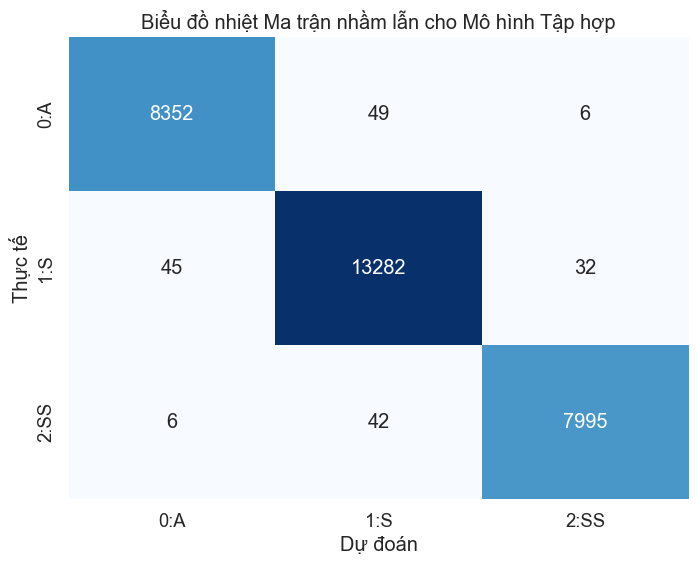

In [19]:
eb_accuracy = accuracy_score(pred, y_test)  # Tính độ chính xác của các dự đoán của mô hình tập hợp bằng cách so sánh chúng với nhãn thực tế (y_test) bằng hàm accuracy_score
eb_matrix = confusion_matrix(pred, y_test)  # Tính ma trận nhầm lẫn cho các dự đoán của mô hình tập hợp bằng hàm confusion_matrix. Ma trận nhầm lẫn cung cấp thông tin về số lượng true positives, true negatives, false positives và false negatives
eb_report = classification_report(pred, y_test)   # Tạo báo cáo phân loại cho các dự đoán của mô hình tập hợp bằng hàm classification_report. Báo cáo phân loại bao gồm các chỉ số như độ chính xác, độ nhớ lại, điểm F1 và hỗ trợ cho mỗi lớp

print('Độ chính xác của Mô hình Tập hợp : ', round(eb_accuracy, 3))   # In độ chính xác của mô hình tập hợp
print('Ma trận nhầm lẫn của Mô hình Tập hợp : \n', eb_matrix) # In ma trận nhầm lẫn của mô hình tập hợp
print('Báo cáo phân loại của Mô hình Tập hợp :\n', eb_report)   # In báo cáo phân loại của mô hình tập hợp

# Giả sử bạn đã có pred và y_test được định nghĩa cho Mô hình Tập hợp của bạn

eb_accuracy = accuracy_score(pred, y_test) # Tính độ chính xác của mô hình tập hợp
eb_matrix = confusion_matrix(pred, y_test) # Tạo ma trận nhầm lẫn cho mô hình tập hợp
eb_report = classification_report(pred, y_test) # Tạo báo cáo phân loại cho mô hình tập hợp

print('Độ chính xác của Mô hình Tập hợp : ', round(eb_accuracy, 3)) # In độ chính xác của mô hình tập hợp
print('Ma trận nhầm lẫn của Mô hình Tập hợp : \n', eb_matrix) # In ma trận nhầm lẫn của mô hình tập hợp
print('Báo cáo phân loại của Mô hình Tập hợp :\n', eb_report) # In báo cáo phân loại của mô hình tập hợp

# Vẽ ma trận nhầm lẫn dưới dạng biểu đồ nhiệt
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Điều chỉnh kích thước phông chữ để dễ đọc hơn
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Biểu đồ nhiệt Ma trận nhầm lẫn cho Mô hình Tập hợp")
plt.show()

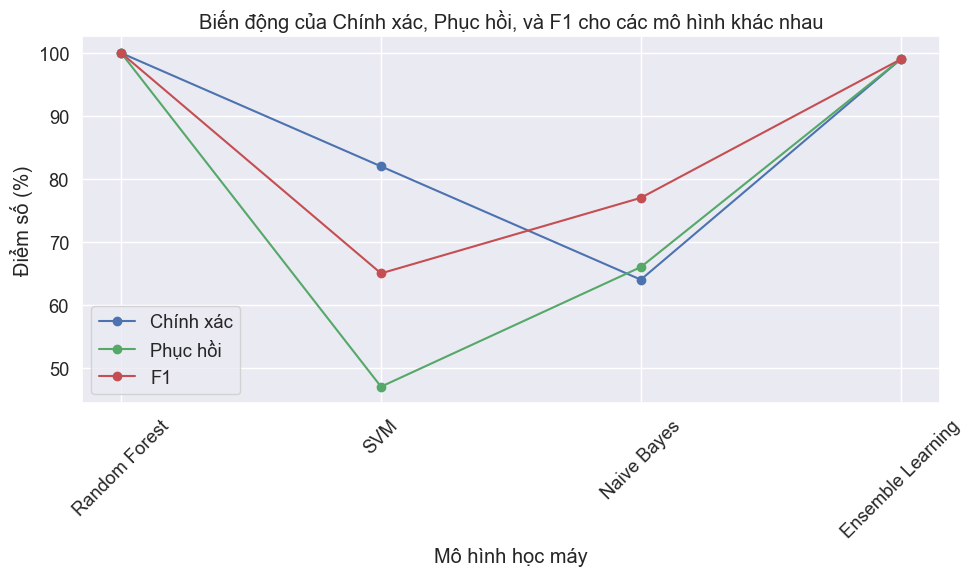

In [20]:
# Vẽ các chỉ số đánh giá của từng mô hình trong một hình

# Tên mô hình
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Điểm chính xác
precision = [100, 82, 64, 99]

# Điểm phục hồi
recall = [100, 47, 66, 99]

# Điểm F1
f1_score = [100, 65, 77, 99]

# Giá trị trục X (mô hình)
x = range(len(models))

# Tạo hình và trục cho biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ điểm chính xác
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Chính xác')

# Vẽ điểm phục hồi
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Phục hồi')

# Vẽ điểm F1
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1')

# Đặt dấu gạch và nhãn trục X
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Mô hình học máy')

# Đặt nhãn trục Y
ax.set_ylabel('Điểm số (%)')

# Đặt tiêu đề biểu đồ
ax.set_title('Biến động của Chính xác, Phục hồi, và F1 cho các mô hình khác nhau')

# Thêm chú thích
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.grid(True)
plt.show()

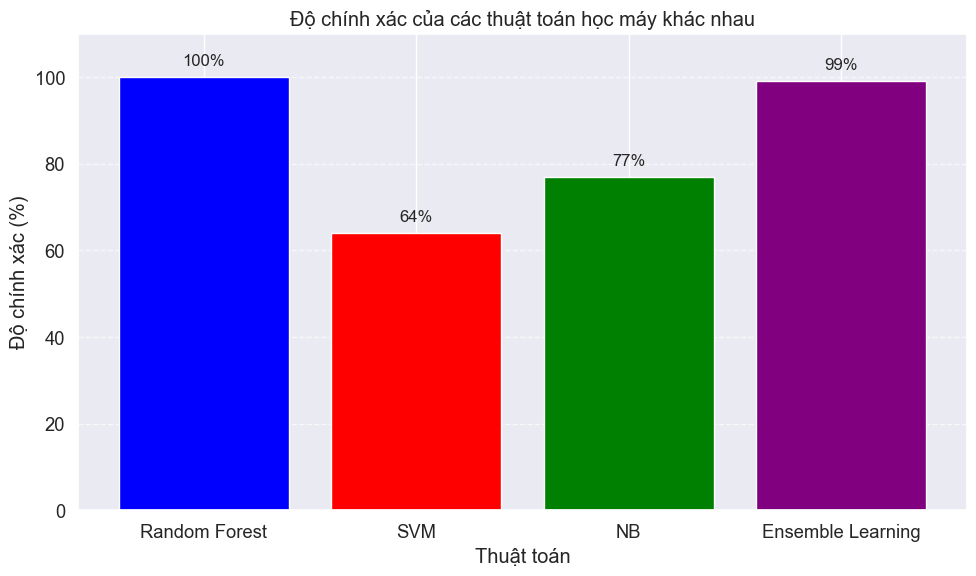

In [21]:
# Định nghĩa các thuật toán và độ chính xác tương ứng của chúng
thuat_toan = ['Random Forest', 'SVM', 'NB', 'Ensemble Learning']
do_chinh_xac = [100, 64, 77, 99]

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(thuat_toan, do_chinh_xac, color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 110)  # Đặt giới hạn cho trục y để tăng khả năng trực quan
plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác (%)')
plt.title('Độ chính xác của các thuật toán học máy khác nhau')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị độ chính xác trên đỉnh các cột
for i, v in enumerate(do_chinh_xac):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()